In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn/botswana_bank_customer_churn.csv


**Veri Setinin Yüklenmesi ve Veriye Ön Bakış**

In [121]:
## veri setinin yüklenmesi
df=pd.read_csv("/kaggle/input/bank-customer-churn/botswana_bank_customer_churn.csv")

In [122]:
## gözlem ve değişken sayısını öğrenelim.
print("Değişken Sayısı=",df.shape[1]-1)
print("Gözlem Sayısı=",df.shape[0])

Değişken Sayısı= 24
Gözlem Sayısı= 115640


In [123]:
##İlk 10 satıra göz atalım
pd.set_option('display.max_columns', None)
df.head(10)


,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,Education Level,Address,Contact Information,Customer Tenure,Customer Segment,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints
0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,High School,"26644 Diaz Viaduct\nNorth Jessicaville, VI 14852",001-301-934-3058x0825,30,Retail,Phone,397,24,41959.74,0,NaN,NaN,211359.05,1,0
1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,High School,"5642 Rachel Pass Suite 320\nPort Peggy, RI 75805",+1-581-683-4267,27,SME,Email,665,10,8916.67,0,NaN,NaN,30624.76,4,1
2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,High School,00025 Brittany Flats Apt. 543\nNew Amandaborou...,9753900004,14,Retail,Email,715,21,43270.54,0,NaN,NaN,111956.61,2,6
3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,High School,Unit 3386 Box 0088\nDPO AE 71940,+1-928-477-2856x660,23,Corporate,Phone,747,17,17887.65,0,NaN,NaN,201187.61,1,0
4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,Master's,"0120 Leslie River\nWest Lindseychester, MN 98290",204.515.2388,22,Corporate,Email,549,25,32686.84,0,NaN,NaN,60391.24,5,6
5,6,c18b027e-b108-4900-b413-dac87e2ee9b5,Gonzales,Ashley,1987-11-28,Male,Single,0,"Surveyor, building",55608.75,Bachelor's,"PSC 3787, Box 9869\nAPO AP 62324",001-880-967-5883x0508,15,Retail,Email,809,27,37218.81,1,Account Closure,2024-07-31,31206.81,2,10
6,7,7091e271-7d2b-4e73-934f-8398e2a1dcbc,Wilcox,Daniel,1976-09-07,Female,Single,1,Publishing copy,22032.61,Diploma,"983 Adams Coves\nLake Roberto, MP 82550",4756961139,15,Retail,Email,690,29,26200.00,0,NaN,NaN,198443.50,2,1
7,8,d5e80b75-bd3f-4d8a-b847-0868f8eb9e40,Lopez,Johnny,1993-08-05,Male,Divorced,4,Industrial buyer,73462.72,Diploma,"905 Jackson View Suite 009\nSouth Amymouth, PA...",001-577-988-4031x4410,3,Corporate,Email,605,30,25156.25,0,NaN,NaN,96378.05,4,6
8,9,9eba62c1-0af0-4424-9218-435ece0689aa,Miles,Kelly,2001-08-03,Male,Divorced,3,Medical sales representative,30054.43,Bachelor's,"6398 Morgan Knolls\nJulieborough, NH 55183",001-245-374-7034x4970,20,Corporate,Phone,634,16,41854.08,0,NaN,NaN,108395.17,5,1
9,10,4eea7068-ea07-4898-bb04-6ccd8b729fc9,Thompson,Anthony,1991-01-12,Female,Divorced,5,Media buyer,24129.53,Master's,"674 Reed Islands\nLoweville, TX 67579",+1-814-630-2270x6096,21,SME,Phone,831,10,30914.02,0,NaN,NaN,99830.84,4,5


In [124]:
##Modeli eğitmemize katkı sağlamayacak sütunları(değişkenleri) silelim.
drop_sutun = ['RowNumber', 'CustomerId', 'Surname', 'First Name',"Churn Reason","Churn Date","Contact Information","Address"]##Adres sütunu karışık olduğu için sildim.
df = df.drop(columns=drop_sutun)
print("Silindikten Sonra Değişken Sayısı=",df.shape[1])

Silindikten Sonra Değişken Sayısı= 17


In [125]:
##Tekrarlayan satır var mı kontrol edelim.
print("Toplam tekrarlanan satır sayısı:", df.duplicated().sum())

Toplam tekrarlanan satır sayısı: 0


In [126]:
##Her Sütundaki Eşsiz Değer Sayısına Bakalım
df.nunique()

Date of Birth                       21094
Gender                                  2
Marital Status                          3
Number of Dependents                    6
Occupation                            639
Income                             114953
Education Level                         4
Customer Tenure                        30
Customer Segment                        3
Preferred Communication Channel         2
Credit Score                          551
Credit History Length                  30
Outstanding Loans                  114298
Churn Flag                              2
Balance                            115387
NumOfProducts                           5
NumComplaints                          11
dtype: int64

In [127]:
##Meslek sütununda çok fazla eşşiz değer var.Bunlar encoding yaparken zorluk çıkaracağı için bu sütunu sildim.İleriki çalışmalarda bu değerler kategorize edilebilinir.
value_counts = df['Occupation'].value_counts()
value_percentages = (value_counts / len(df)) * 100
pareto_df = pd.DataFrame({
    'Değer': value_counts.index,
    'Sayı': value_counts.values,
    'Yüzde': value_percentages.values
})

pareto_df = pareto_df.sort_values(by='Sayı', ascending=False).reset_index(drop=True)
pareto_df.head(25)

,Değer,Sayı,Yüzde
0,"Engineer, materials",222,0.191975
1,"Biochemist, clinical",218,0.188516
2,Contractor,217,0.187651
3,"Surveyor, building",215,0.185922
4,"Surveyor, commercial/residential",215,0.185922
5,Quarry manager,214,0.185057
6,"Pharmacist, hospital",214,0.185057
7,"Surveyor, land/geomatics",214,0.185057
8,Ambulance person,213,0.184192
9,"Engineer, broadcasting (operations)",213,0.184192


In [128]:
df = df.drop(columns=['Occupation'])
print(df.shape[1])

16


In [129]:
##Date of Birth sütununu kullanarak yaş değişkeni oluşturalım.
from datetime import datetime
from dateutil.relativedelta import relativedelta
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

# Yaş sütununu hesapla
df['Age'] = df['Date of Birth'].apply(lambda x: relativedelta(datetime.now(), x).years)

print(df["Age"])
df = df.drop(columns=['Date of Birth'])
print(df.shape[1])

0         37
1         24
2         70
3         33
4         32
          ..
115635    59
115636    69
115637    69
115638    31
115639    49
Name: Age, Length: 115640, dtype: int64
16


**EDA(Keşifçi Veri Analizi)**

In [130]:
import matplotlib.pyplot as plt #görselleştirme kutüphanelerinin import edilmesi
import seaborn as sns


In [131]:
categoric_cols= ["Gender","Marital Status","Education Level","Customer Segment","Preferred Communication Channel"]
num_cols=[col for col  in df.columns if col not in categoric_cols]
print(num_cols)
df_sayısal = df[num_cols]
df_sayısal.head()


['Number of Dependents', 'Income', 'Customer Tenure', 'Credit Score', 'Credit History Length', 'Outstanding Loans', 'Churn Flag', 'Balance', 'NumOfProducts', 'NumComplaints', 'Age']


,Number of Dependents,Income,Customer Tenure,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints,Age
0,3,77710.14,30,397,24,41959.74,0,211359.05,1,0,37
1,1,58209.87,27,665,10,8916.67,0,30624.76,4,1,24
2,1,9794.01,14,715,21,43270.54,0,111956.61,2,6,70
3,5,15088.98,23,747,17,17887.65,0,201187.61,1,0,33
4,2,60726.56,22,549,25,32686.84,0,60391.24,5,6,32


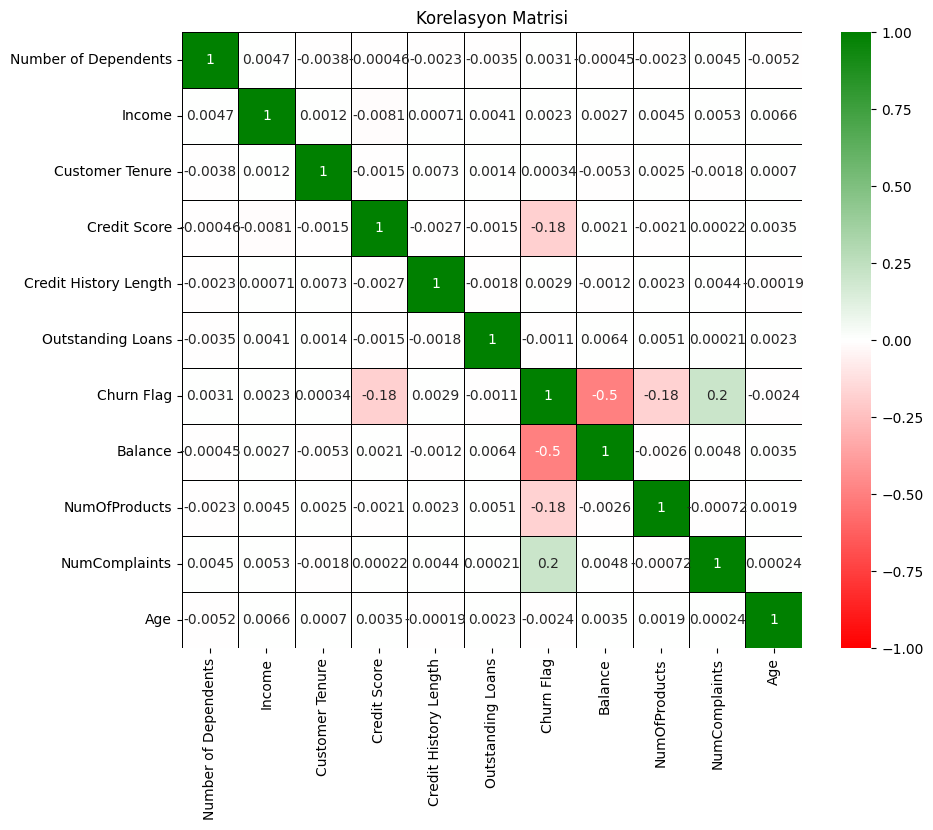

In [132]:
##Korelasyon Matrisi
corr_matrix = df_sayısal.corr()

def custom_cmap():
    from matplotlib.colors import LinearSegmentedColormap

    colors = ["red", "white", "green"]
    return LinearSegmentedColormap.from_list("custom_cmap", colors)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=custom_cmap(), center=0, vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Korelasyon Matrisi')
plt.show()

Churn_Flag ile Diğer Değişkenler Arasındaki Korelasyonlar:
                       Churn Flag
Churn Flag               1.000000
NumComplaints            0.204626
Number of Dependents     0.003109
Credit History Length    0.002899
Income                   0.002286
Customer Tenure          0.000344
Outstanding Loans       -0.001146
Age                     -0.002387
NumOfProducts           -0.179083
Credit Score            -0.182802
Balance                 -0.499981


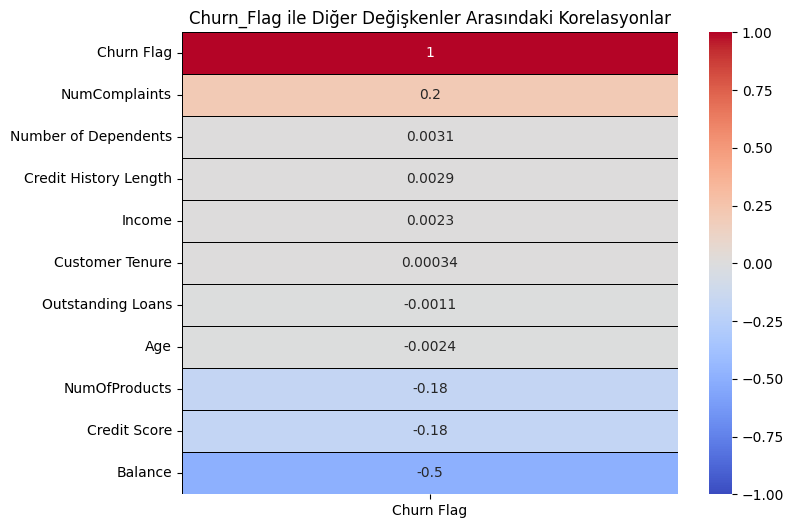

In [133]:
##Sadece output(çıktıya) göre korelasyon
corr_matrix = df_sayısal.corr()

# Churn_Flag ile diğer değişkenler arasındaki korelasyonu seç
churn_corr = corr_matrix[['Churn Flag']].sort_values(by='Churn Flag', ascending=False)

# Korelasyon matrisini yazdır
print("Churn_Flag ile Diğer Değişkenler Arasındaki Korelasyonlar:")
print(churn_corr)

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Churn_Flag ile Diğer Değişkenler Arasındaki Korelasyonlar')
plt.show()

In [134]:
#Balance ile orta derece negatif korelasyon var

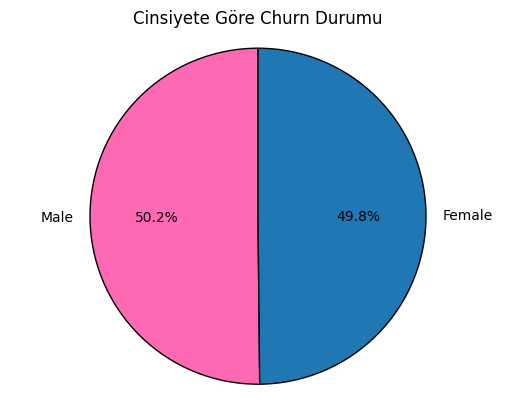

In [135]:
gender_churn = df[df['Churn Flag'] == 1]['Gender'].value_counts()

# Pie chart oluşturma
colors = ['#ff69b4', '#1f77b4']  # Pembe ve Mavi renkler
plt.pie(gender_churn, labels=gender_churn.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

# Başlık ekleme
plt.title('Cinsiyete Göre Churn Durumu')

# Grafiği gösterme
plt.axis('equal')  # Daire şeklinde tutma
plt.show()

In [136]:
##Churn olma oranı iki cinsiyette birbirine yakın.

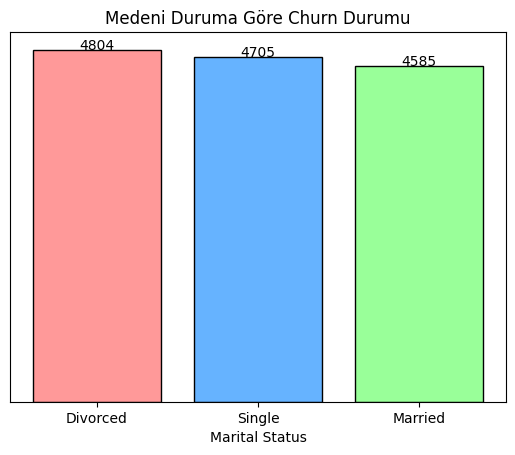

In [137]:
marital_churn = df[df['Churn Flag'] == 1]['Marital Status'].value_counts()

# Sütun grafiği oluşturma
plt.bar(marital_churn.index, marital_churn, color=['#ff9999', '#66b3ff', '#99ff99'], edgecolor='black')

# Eksen başlıkları ve grafik başlığı ekleme
plt.xlabel('Marital Status')
plt.title('Medeni Duruma Göre Churn Durumu')

# Sütunların üzerine değerleri ekleme (data labels)
for i, value in enumerate(marital_churn):
    plt.text(i, value + 0.1, str(value), ha='center')

# Y eksenini kaldırma
plt.gca().axes.get_yaxis().set_visible(False)

# Grafiği gösterme
plt.show()

In [138]:
##Churn olma durumu en fazla boşanmış olan müşterilerde en az ise evli olanlarda.

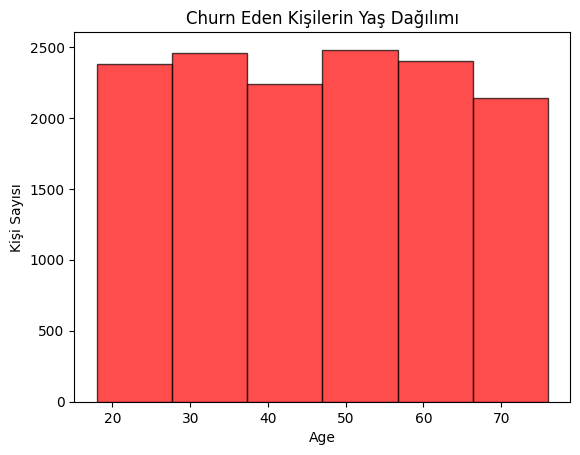

In [139]:
plt.hist(df[df['Churn Flag'] == 1]['Age'], bins=6, color='red', edgecolor='black', alpha=0.7)

# Eksen başlıkları ve grafik başlığı ekleme
plt.xlabel('Age')
plt.ylabel('Kişi Sayısı')
plt.title('Churn Eden Kişilerin Yaş Dağılımı')

# Grafiği gösterme
plt.show()

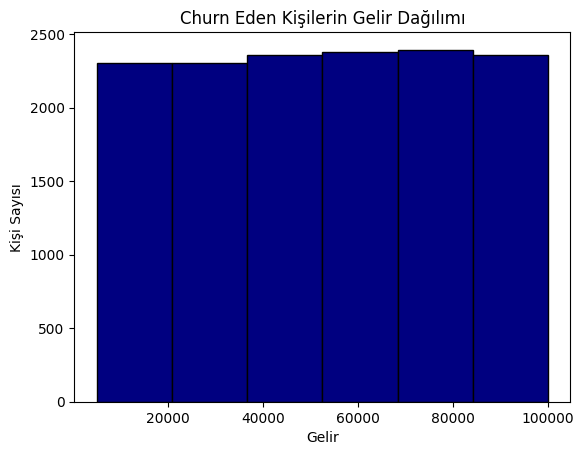

In [140]:
plt.hist(df[df['Churn Flag'] == 1]['Income'], bins=6, color='navy', edgecolor='black')

# Eksen başlıkları ve grafik başlığı ekleme
plt.xlabel('Gelir')
plt.ylabel('Kişi Sayısı')
plt.title('Churn Eden Kişilerin Gelir Dağılımı')

# Grafiği gösterme
plt.show()

**Veri Ön İşleme**

In [141]:
##Eksik Değer Kontrolü
df.isnull().sum()
#Eksik değer yoktur.

Gender                             0
Marital Status                     0
Number of Dependents               0
Income                             0
Education Level                    0
Customer Tenure                    0
Customer Segment                   0
Preferred Communication Channel    0
Credit Score                       0
Credit History Length              0
Outstanding Loans                  0
Churn Flag                         0
Balance                            0
NumOfProducts                      0
NumComplaints                      0
Age                                0
dtype: int64

In [142]:
##Aykırı Değer Analizi
sayısal_cols = [col for col in num_cols if col != 'Churn Flag']

print(sayısal_cols)

['Number of Dependents', 'Income', 'Customer Tenure', 'Credit Score', 'Credit History Length', 'Outstanding Loans', 'Balance', 'NumOfProducts', 'NumComplaints', 'Age']


In [143]:
for col in sayısal_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"{col} sütununda aykırı değerler var:")
        print(outliers)
    else:
        print(f"{col} sütununda aykırı değer yok")

Number of Dependents sütununda aykırı değer yok
Income sütununda aykırı değer yok
Customer Tenure sütununda aykırı değer yok
Credit Score sütununda aykırı değer yok
Credit History Length sütununda aykırı değer yok
Outstanding Loans sütununda aykırı değer yok
Balance sütununda aykırı değer yok
NumOfProducts sütununda aykırı değer yok
NumComplaints sütununda aykırı değer yok
Age sütununda aykırı değer yok


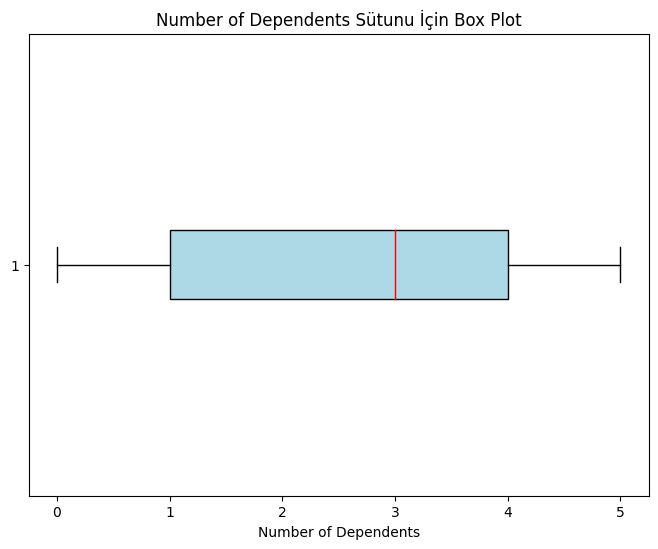

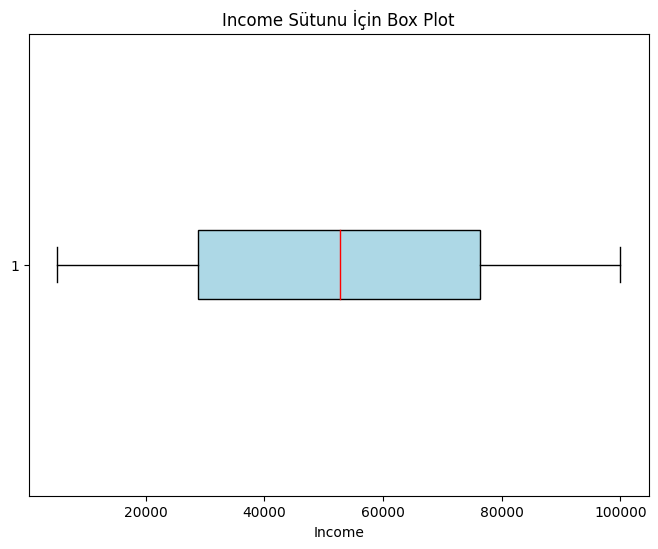

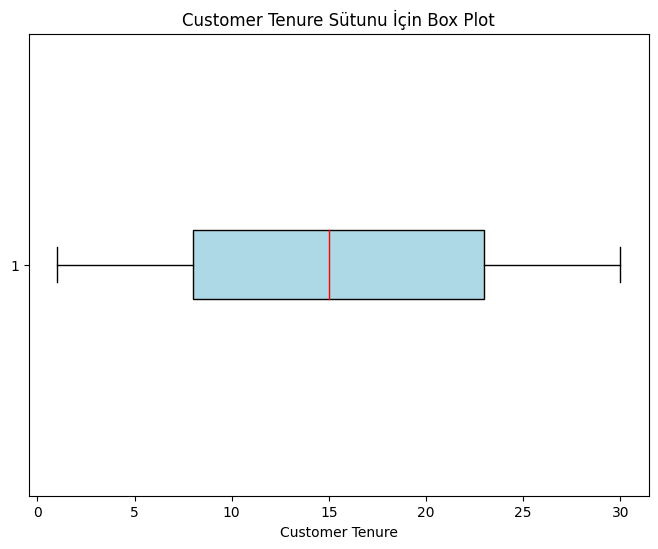

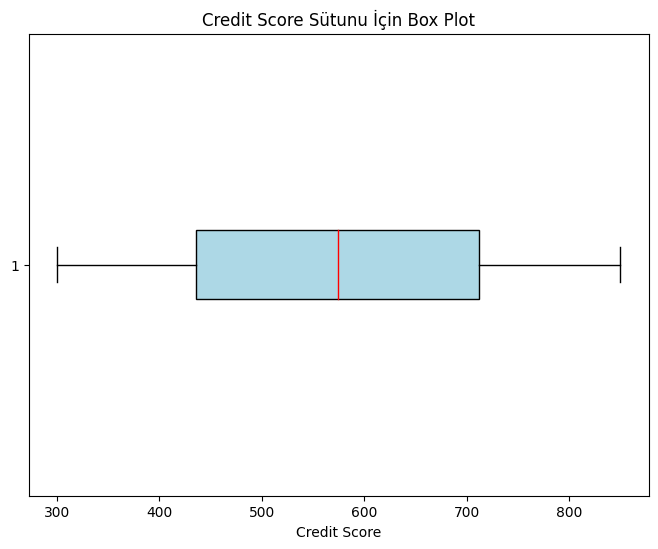

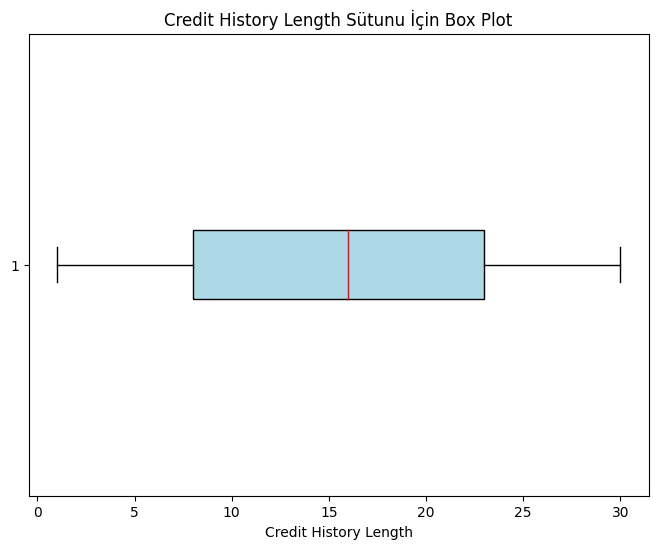

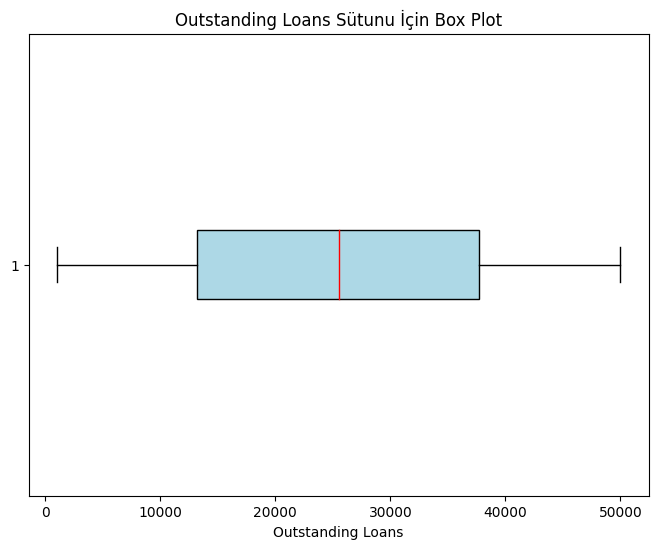

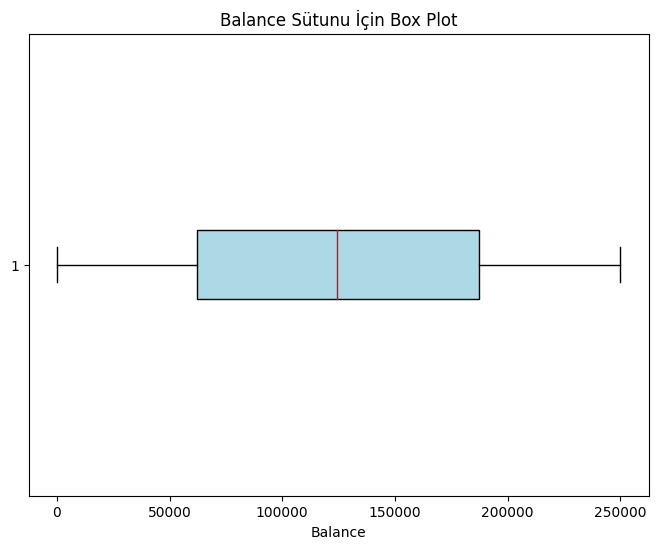

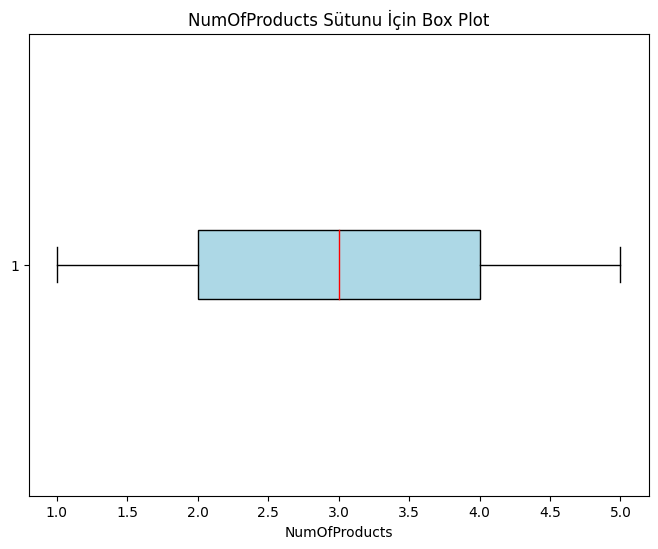

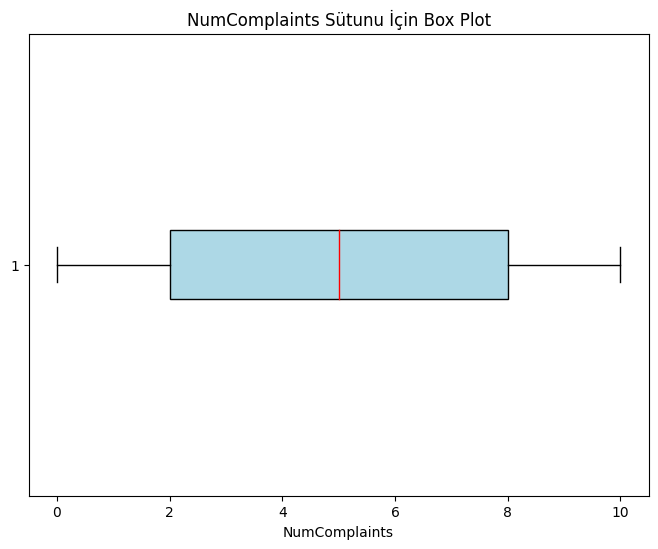

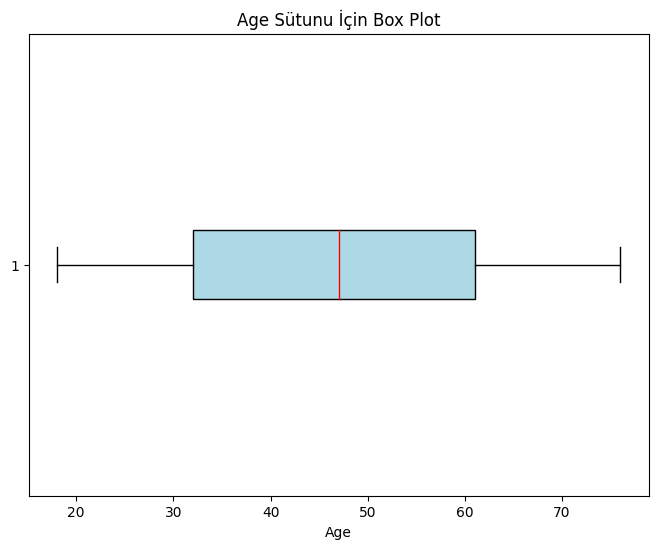

In [144]:
##Kutu Diyagramı Çizelim.
for col in sayısal_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='black'), 
                medianprops=dict(color='red'))
    plt.title(f'{col} Sütunu İçin Box Plot')
    plt.xlabel(col)
    plt.show()

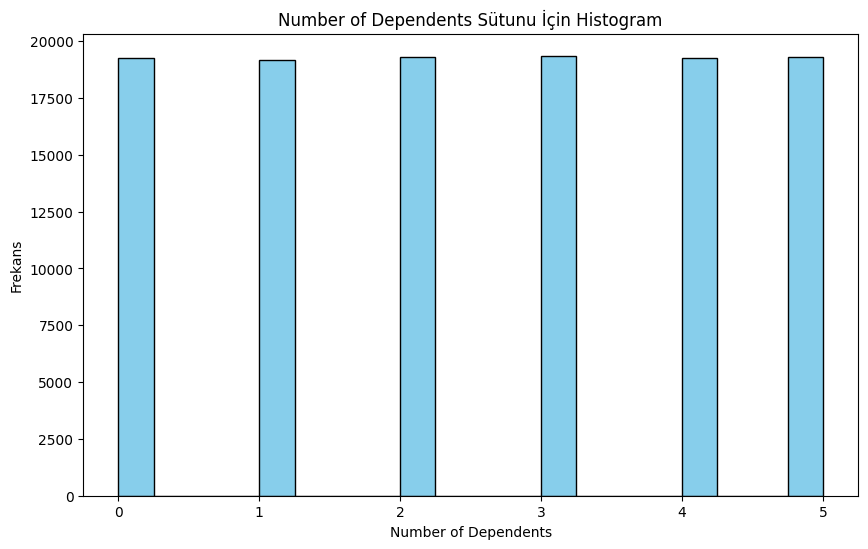

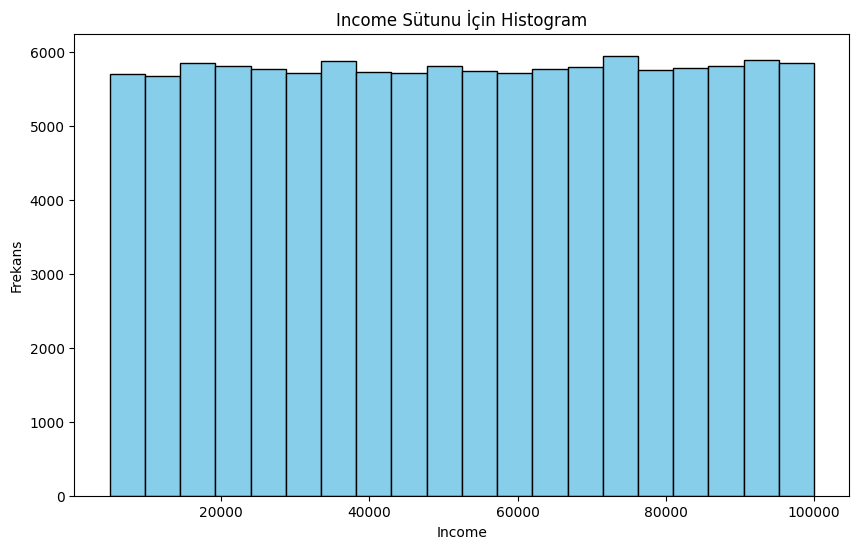

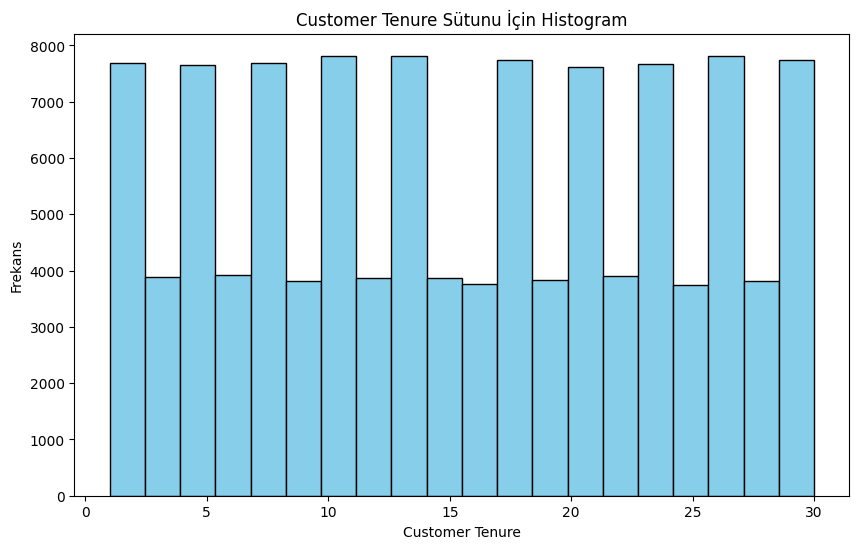

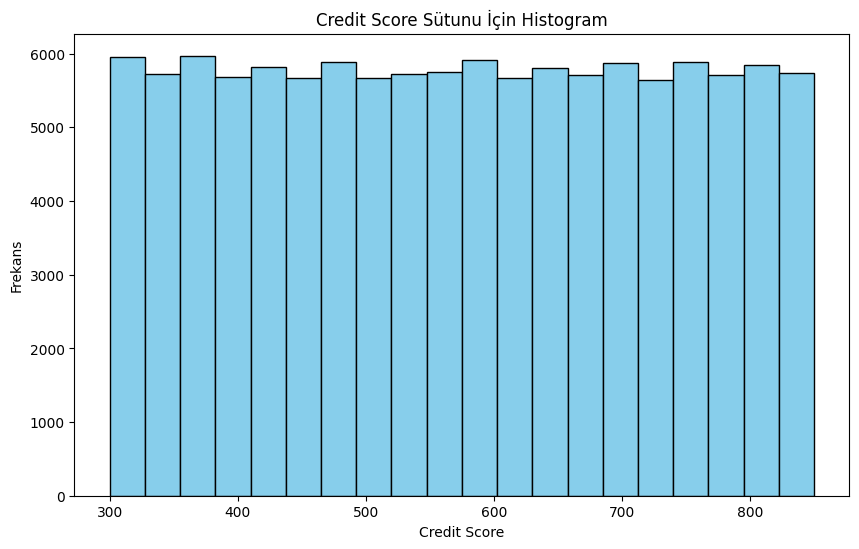

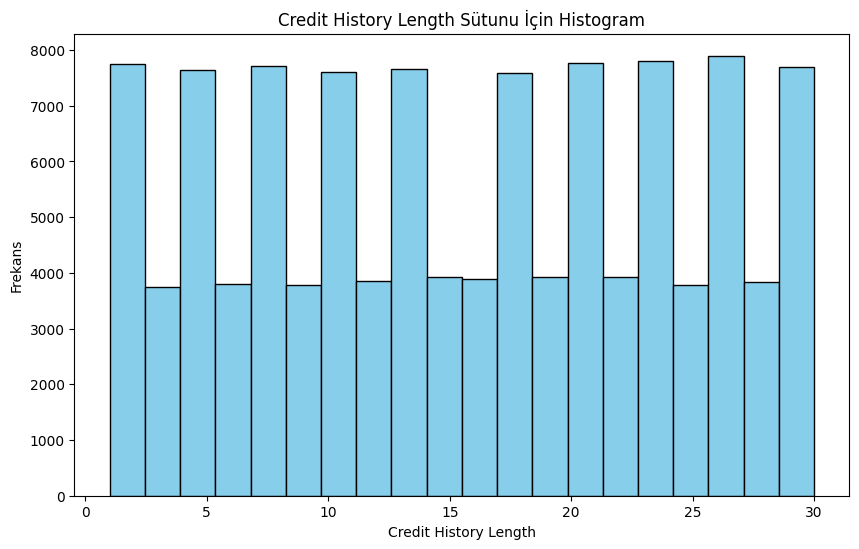

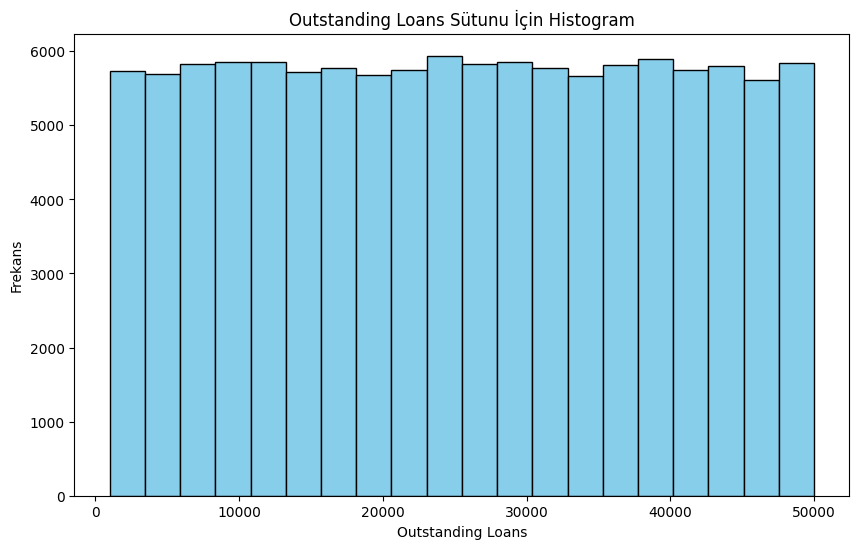

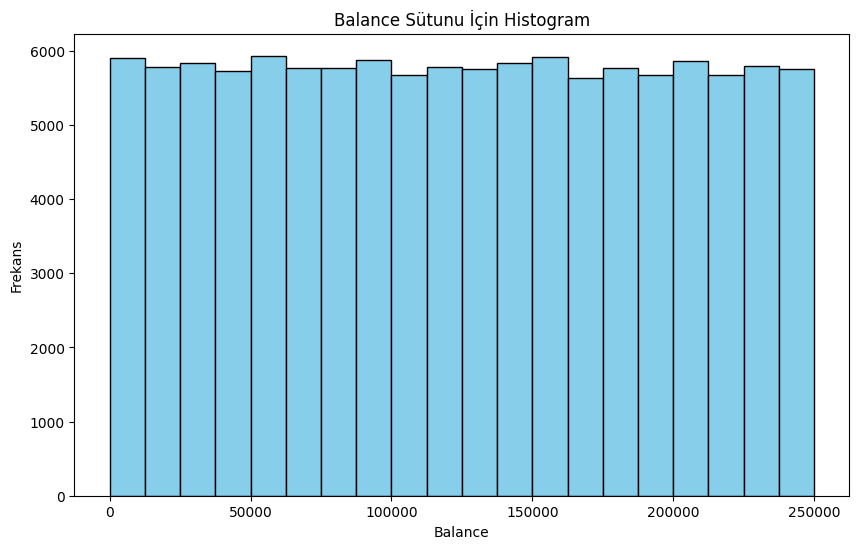

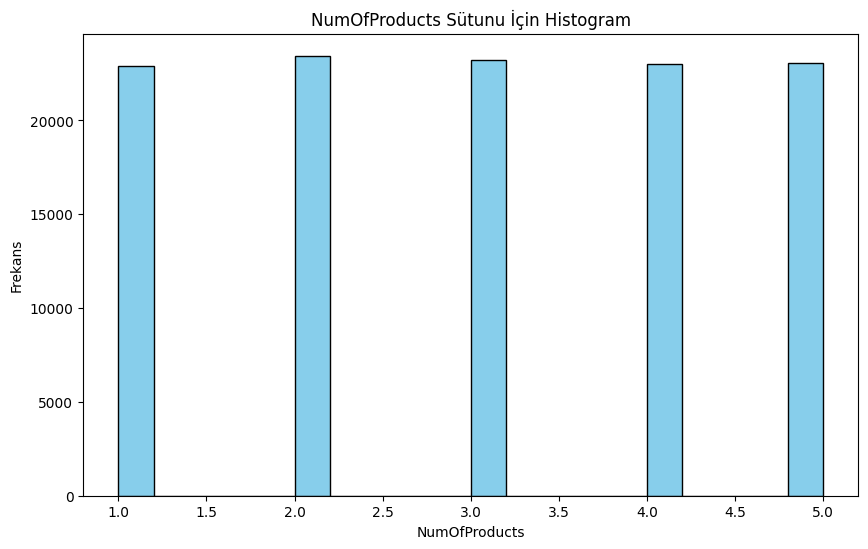

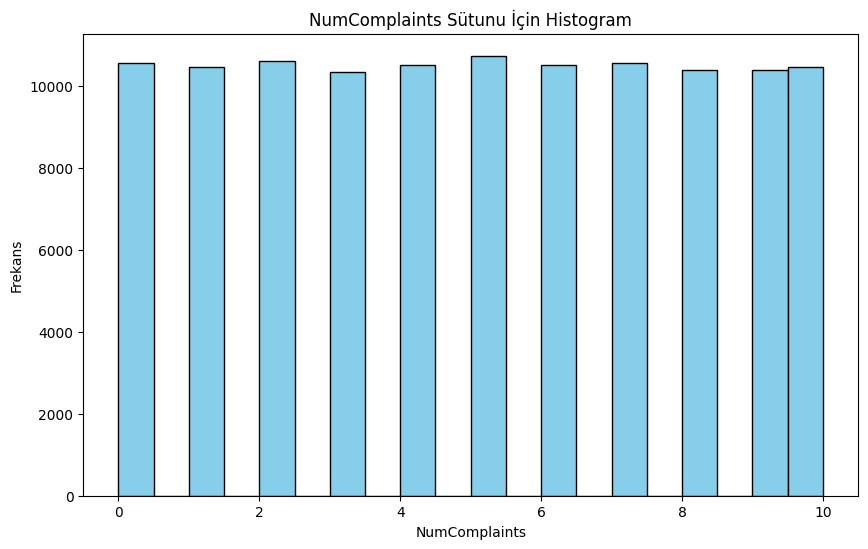

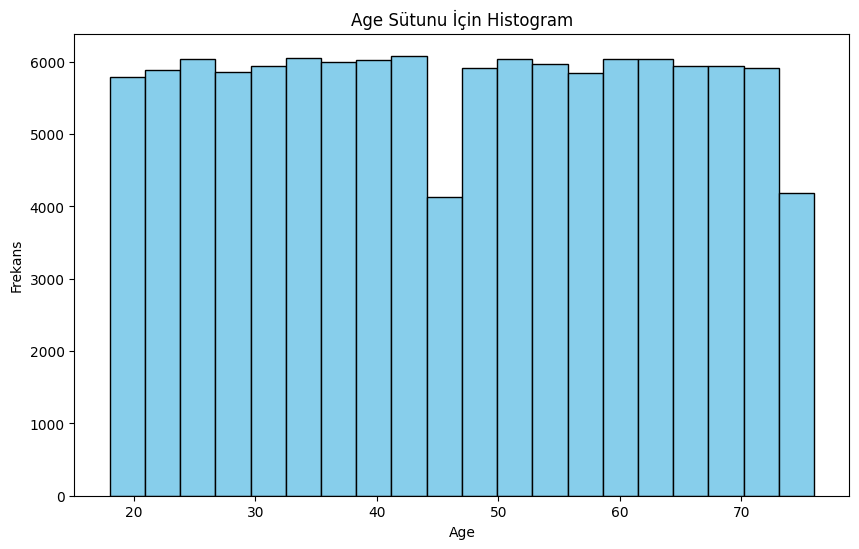

In [145]:
## Sayısal değişkenler için Histogram çizelim.
for col in sayısal_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{col} Sütunu İçin Histogram')
    plt.xlabel(col)
    plt.ylabel('Frekans')
    plt.show()

In [146]:
##Scaling
from sklearn.preprocessing import StandardScaler
# StandardScaler oluşturma
scaler = StandardScaler()

for col in sayısal_cols:
    df[col] = scaler.fit_transform(df[[col]])

print(df[sayısal_cols].head())

   Number of Dependents    Income  Customer Tenure  Credit Score  \
0              0.291158  0.913930         1.676578     -1.114625   
1             -0.880322  0.203011         1.329925      0.570202   
2             -0.880322 -1.562082        -0.172239      0.884535   
3              1.462638 -1.369044         0.867720      1.085709   
4             -0.294582  0.294761         0.752169     -0.159051   

   Credit History Length  Outstanding Loans   Balance  NumOfProducts  \
0               0.976753           1.164867  1.200937      -1.416563   
1              -0.640885          -1.174002 -1.301956       0.709054   
2               0.630116           1.257649 -0.175635      -0.708024   
3               0.167934          -0.539014  1.060078      -1.416563   
4               1.092298           0.508509 -0.889736       1.417593   

   NumComplaints       Age  
0      -1.580025 -0.573900  
1      -1.263496 -1.351742  
2       0.319148  1.400622  
3      -1.580025 -0.813236  
4       0.319

In [148]:
## Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# Label Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital Status'] = le.fit_transform(df['Marital Status'])

# One-Hot Encoding
df_encoded = pd.get_dummies(df[['Customer Segment', 'Preferred Communication Channel']])
df = pd.concat([df.drop(['Customer Segment', 'Preferred Communication Channel'], axis=1), df_encoded], axis=1)
#Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['High School', "Master's", "Bachelor's", 'Diploma']])
df['Education Level'] = ordinal_encoder.fit_transform(df[['Education Level']])


In [150]:
df.head()

,Gender,Marital Status,Number of Dependents,Income,Education Level,Customer Tenure,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Balance,NumOfProducts,NumComplaints,Age,Customer Segment_Corporate,Customer Segment_Retail,Customer Segment_SME,Preferred Communication Channel_Email,Preferred Communication Channel_Phone
0,1,0,0.291158,0.913930,0.0,1.676578,-1.114625,0.976753,1.164867,0,1.200937,-1.416563,-1.580025,-0.573900,False,True,False,False,True
1,0,1,-0.880322,0.203011,0.0,1.329925,0.570202,-0.640885,-1.174002,0,-1.301956,0.709054,-1.263496,-1.351742,False,False,True,True,False
2,0,2,-0.880322,-1.562082,0.0,-0.172239,0.884535,0.630116,1.257649,0,-0.175635,-0.708024,0.319148,1.400622,False,True,False,True,False
3,0,0,1.462638,-1.369044,0.0,0.867720,1.085709,0.167934,-0.539014,0,1.060078,-1.416563,-1.580025,-0.813236,True,False,False,False,True
4,0,0,-0.294582,0.294761,1.0,0.752169,-0.159051,1.092298,0.508509,0,-0.889736,1.417593,0.319148,-0.873070,True,False,False,True,False


In [ ]:
##Modelin Eğitilmesi

In [159]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [161]:
X = df.drop('Churn Flag', axis=1)  # Özellikler
y = df['Churn Flag']  # Hedef değişken

X = pd.get_dummies(X)  

# Model Tanımlamaları
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Scorers
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

# Sonuçları saklayacağımız bir sözlük
results = {}

# Her bir model için cross-validation işlemi ve metrik hesaplama
for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Cross-validation işlemi
    scores = cross_validate(model, X, y, cv=10, scoring=scorers)
    
    results[name] = {
        'F1 Score': scores['test_f1'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'Accuracy': scores['test_accuracy'].mean()
    }

# Sonuçları DataFrame olarak oluşturma ve gösterme
results_df = pd.DataFrame(results).T
print(results_df)

Evaluating KNN...
Evaluating Random Forest...
Evaluating SVM...
               F1 Score  Precision    Recall  Accuracy
KNN            0.678619   0.833875  0.572159  0.933967
Random Forest  0.947060   0.977859  0.918193  0.987496
SVM            0.997872   0.997734  0.998013  0.999481


**Hiper Parametre Optimizasyonu**

In [162]:
##Tüm metriklerde en iyi sonucu veren algortima SVM(Destek Vektör Makineleri) ile hiperparametre optimazyonu yapalım.
from sklearn.model_selection import GridSearchCV

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

# Modeli tanımla
dvm = SVC()

# Hiperparametreler için rastgele arama grid'i tanımla
param_dist = {
    'C': uniform(0.1, 100),  # 0.1 ile 100 arasında rastgele değerler
    'gamma': uniform(0.01, 10),  # 0.01 ile 10 arasında rastgele değerler
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4, 5]  # 'poly' çekirdek fonksiyonu için
}

# RandomizedSearchCV nesnesi oluştur
random_search = RandomizedSearchCV(estimator=dvm, param_distributions=param_dist, 
                                    n_iter=3, scoring='accuracy', cv=5, 
                                    n_jobs=-1, verbose=2, random_state=42)

# Modeli fit et
random_search.fit(X, y)

# En iyi parametreleri yazdır
print(f"En iyi parametreler: {random_search.best_params_}")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
En iyi parametreler: {'C': 37.55401188473625, 'degree': 2, 'gamma': 1.844347898661638, 'kernel': 'linear'}
[CV] END C=37.55401188473625, degree=2, gamma=1.844347898661638, kernel=linear; total time=   9.9s
[CV] END C=46.02488919658672, degree=2, gamma=6.021150117432088, kernel=poly; total time= 2.5min
[CV] END C=37.55401188473625, degree=2, gamma=1.844347898661638, kernel=linear; total time=  12.3s
[CV] END C=37.55401188473625, degree=2, gamma=1.844347898661638, kernel=linear; total time=  11.8s
[CV] END C=59.7850157946487, degree=3, gamma=1.5699452033620265, kernel=poly; total time= 2.7min
[CV] END C=46.02488919658672, degree=2, gamma=6.021150117432088, kernel=poly; total time= 4.7min
[CV] END C=37.55401188473625, degree=2, gamma=1.844347898661638, kernel=linear; total time=   9.8s
[CV] END C=59.7850157946487, degree=3, gamma=1.5699452033620265, kernel=poly; total time= 2.4min
[CV] END C=37.55401188473625, degree=2, gamma=1.8

**Final Modelin Değerlendirilmesi**

In [177]:
best_params = random_search.best_params_
best_model = SVC(**best_params)

best_model.fit(X,y)

[CV] END C=59.7850157946487, degree=3, gamma=1.5699452033620265, kernel=poly; total time= 2.5min
[CV] END C=46.02488919658672, degree=2, gamma=6.021150117432088, kernel=poly; total time= 1.7min
[CV] END C=37.55401188473625, degree=2, gamma=1.844347898661638, kernel=linear; total time=  12.3s
[CV] END C=59.7850157946487, degree=3, gamma=1.5699452033620265, kernel=poly; total time= 2.7min
[CV] END C=59.7850157946487, degree=3, gamma=1.5699452033620265, kernel=poly; total time= 3.5min
[CV] END C=46.02488919658672, degree=2, gamma=6.021150117432088, kernel=poly; total time= 4.4min


SVC(C=37.55401188473625, degree=2, gamma=1.844347898661638, kernel='linear')

[CV] END C=37.55401188473625, degree=2, gamma=1.844347898661638, kernel=linear; total time=   9.4s
[CV] END C=59.7850157946487, degree=3, gamma=1.5699452033620265, kernel=poly; total time= 2.4min
[CV] END C=46.02488919658672, degree=2, gamma=6.021150117432088, kernel=poly; total time= 2.9min
[CV] END C=37.55401188473625, degree=2, gamma=1.844347898661638, kernel=linear; total time=  13.3s
[CV] END C=59.7850157946487, degree=3, gamma=1.5699452033620265, kernel=poly; total time= 3.5min
[CV] END C=46.02488919658672, degree=2, gamma=6.021150117432088, kernel=poly; total time= 3.3min
[CV] END C=46.02488919658672, degree=2, gamma=6.021150117432088, kernel=poly; total time= 4.1min


Model Doğruluğu: 0.9998
Kesinlik (Precision): 0.9989
Geri Çağırma (Recall): 0.9994
F1 Skoru: 0.9991
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101546
           1       1.00      1.00      1.00     14094

    accuracy                           1.00    115640
   macro avg       1.00      1.00      1.00    115640
weighted avg       1.00      1.00      1.00    115640



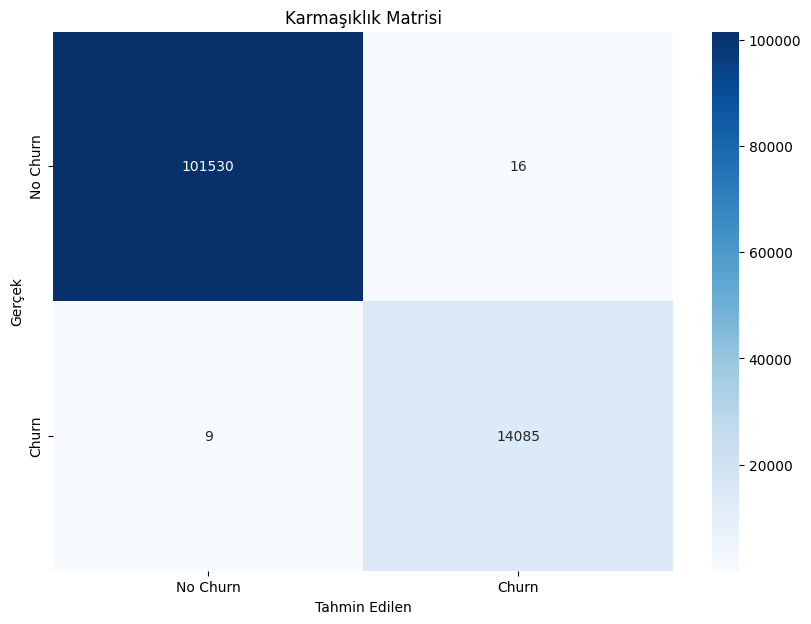

In [181]:
from sklearn.metrics import  classification_report, confusion_matrix
y_pred = best_model.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)  
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
report = classification_report(y,y_pred)
cm = confusion_matrix(y, y_pred)
# Metrikleri yazdır
print(f"Model Doğruluğu: {accuracy:.4f}")
print(f"Kesinlik (Precision): {precision:.4f}")
print(f"Geri Çağırma (Recall): {recall:.4f}")
print(f"F1 Skoru: {f1:.4f}")
print("Sınıflandırma Raporu:")
print(report)

# Karmaşıklık matrisini görselleştir
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karmaşıklık Matrisi')
plt.show()

